In [1]:
import numpy as np

from Packomania import Packomania
from DE import DifferentialEvolution
from benchmark import results2np, get_popsize, benchmark
from utils import *

from time import time
from random import seed

In [2]:

def benchmark_variance(
        differential_weight, 
        crossover_prob,
        max_evaluations,
        optimum_accuracy,
        get_popsize_func,
        num_points_list,
        rng_seed=0
    ):
    start_time = time()
    seed(rng_seed)
    results = []
    for num_points in num_points_list:
        print(f"Num points: {num_points}")
        dim = num_points*2
        
        popsize = get_popsize_func(dim)
        bounds = [[0, 1] for i in range(num_points*2)]
        pk = Packomania(num_points)
        optimum = pk.distance
        
        de = DifferentialEvolution(
            scattering_points,
            bounds,
            popsize,
            differential_weight,
            crossover_prob
        )
        de.set_optimum(optimum, optimum_accuracy)
        r = benchmark_variance_run(de)
        results.append(r)
    return results
        
#         de_set_optimum(optimum, optimum_accuracy)
        
        
    
def benchmark_variance_run(algo,
                            max_evaluations=5e6,
                            num_runs=10,
                            verbose=True):
        results = dict()
        results['iter_evaluations'] = []
        results['iter_variance'] = []
        results['exitflag'] = []
        results['optimum'] = []

        for i in range(1, num_runs+1):
            print(f"RUN #{i}")
            max_eval_variable = max_evaluations
            evaluations = 0
            start_time = time()
            
            algo.reset()
            algo.run(max_evaluations=max_evaluations,
                     verbose=False)
            
            results['iter_evaluations'].append(algo.iter_evals)
            results['iter_variance'].append(algo.iter_var_obj_val)
            results['exitflag'].append(algo.exitflag)
            results['optimum'].append(algo.found_optimum)
           
            print(f"\tRUN DURATION: {time()-start_time}s")
        return results
    
    



In [3]:
num_points_list=[6,7,9]
get_popsize_func_A3 = lambda popsize: get_popsize(popsize, m=15)

results_A3 = benchmark_variance(differential_weight=0.3,
                       crossover_prob=0.99,
                       max_evaluations=5e6,
                       get_popsize_func=get_popsize_func_A3,
                       num_points_list=num_points_list,
                       optimum_accuracy=1e-3)

Num points: 6
RUN #1
Population converged
	RUN DURATION: 21.251179456710815s
RUN #2
Optimum reached
	RUN DURATION: 4.4690141677856445s
RUN #3
Optimum reached
	RUN DURATION: 7.265562534332275s
RUN #4
Optimum reached
	RUN DURATION: 5.19909143447876s
RUN #5
Optimum reached
	RUN DURATION: 6.738962173461914s
RUN #6
Optimum reached
	RUN DURATION: 5.007603645324707s
RUN #7
Optimum reached
	RUN DURATION: 6.391900300979614s
RUN #8
Optimum reached
	RUN DURATION: 4.4092042446136475s
RUN #9
Optimum reached
	RUN DURATION: 14.057451486587524s
RUN #10
Optimum reached
	RUN DURATION: 7.168794631958008s
Num points: 7
RUN #1
Optimum reached
	RUN DURATION: 11.02550482749939s
RUN #2
Maximum number of evaluations
	RUN DURATION: 217.4782326221466s
RUN #3
Population converged
	RUN DURATION: 77.37700128555298s
RUN #4
Optimum reached
	RUN DURATION: 14.284786462783813s
RUN #5
Optimum reached
	RUN DURATION: 14.303733110427856s
RUN #6
Maximum number of evaluations
	RUN DURATION: 217.57095456123352s
RUN #7
Populati

In [4]:
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


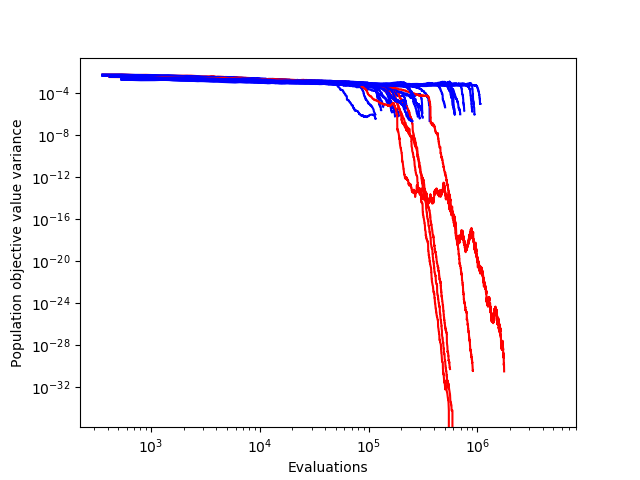

In [8]:
# r_np_6 = results_A3[0]
%matplotlib notebook
for r in results_A3:
    for i in range(len(r['iter_evaluations'])):
        if r['optimum'][i]:
            plt.loglog(r['iter_evaluations'][i], r['iter_variance'][i], 'b')
        else:
            plt.loglog(r['iter_evaluations'][i], r['iter_variance'][i], 'r')

plt.xlabel('Evaluations')
plt.ylabel('Population objective value variance')
plt.savefig('restart_A3_v2.pdf')

In [6]:
num_points_list=[6,7,9]
get_popsize_func_6 = lambda popsize: get_popsize(popsize, m=20)


results_A6 = benchmark_variance(differential_weight=0.1,
                       crossover_prob=0.99,
                       max_evaluations=5e6,
                       get_popsize_func=get_popsize_func_6,
                       num_points_list=num_points_list,
                       optimum_accuracy=1e-6)

Num points: 6
RUN #1
Maximum number of evaluations
	RUN DURATION: 181.40178871154785s
RUN #2
Population converged
	RUN DURATION: 6.0967042446136475s
RUN #3
Maximum number of evaluations
	RUN DURATION: 183.4232919216156s
RUN #4
Maximum number of evaluations
	RUN DURATION: 181.56727266311646s
RUN #5
Maximum number of evaluations
	RUN DURATION: 181.90935611724854s
RUN #6
Optimum reached
	RUN DURATION: 4.211732387542725s
RUN #7
Maximum number of evaluations
	RUN DURATION: 181.61015677452087s
RUN #8
Maximum number of evaluations
	RUN DURATION: 182.51872539520264s
RUN #9
Maximum number of evaluations
	RUN DURATION: 181.30597114562988s
RUN #10
Maximum number of evaluations
	RUN DURATION: 182.22650742530823s
Num points: 7
RUN #1
Population converged
	RUN DURATION: 13.176749229431152s
RUN #2
Population converged
	RUN DURATION: 8.873262166976929s
RUN #3
Maximum number of evaluations
	RUN DURATION: 225.3112473487854s
RUN #4
Maximum number of evaluations
	RUN DURATION: 226.00541925430298s
RUN #5
M

<IPython.core.display.Javascript object>


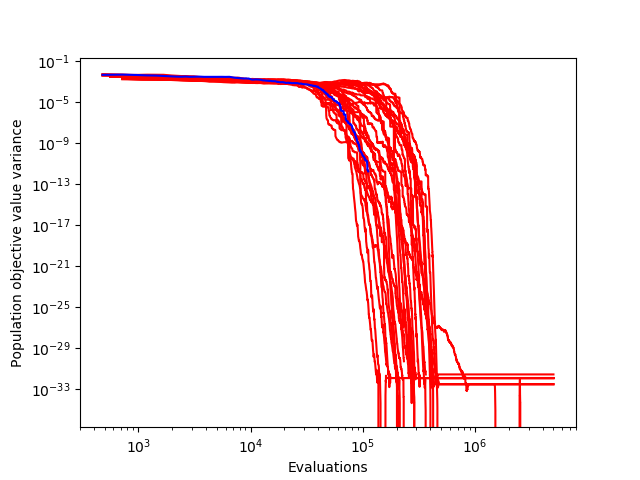

In [10]:
%matplotlib notebook
for r in results_A6:
    for i in range(len(r['iter_evaluations'])):
        if not r['optimum'][i]:
            plt.loglog(r['iter_evaluations'][i], r['iter_variance'][i], 'r')
    
for r in results_A6:
    for i in range(len(r['iter_evaluations'])):
        if r['optimum'][i]:
            plt.loglog(r['iter_evaluations'][i], r['iter_variance'][i], 'b')

plt.xlabel('Evaluations')
plt.ylabel('Population objective value variance')
plt.savefig('restart_A6_v2.pdf')